<a href="https://colab.research.google.com/github/MuhammadjonR/Data_Science_Projetcs/blob/main/AviaCompany_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, RocCurveDisplay # Import necessary functions


In [2]:
df_train = pd.read_csv('/content/train_dataset.csv')
df_test = pd.read_csv('/content/test_dataset.csv')
solutions = pd.read_csv('/content/sample_submission.csv')

In [3]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [5]:
df_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [7]:
churn_rate = df_train['satisfaction'].value_counts()/len(df_train)*100

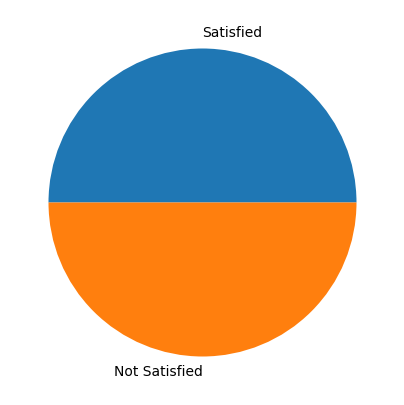

In [13]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Satisfied','Not Satisfied'])
plt.show()

In [12]:
df_train[['satisfaction']].value_counts()

,count
satisfaction,
0,5000
1,5000


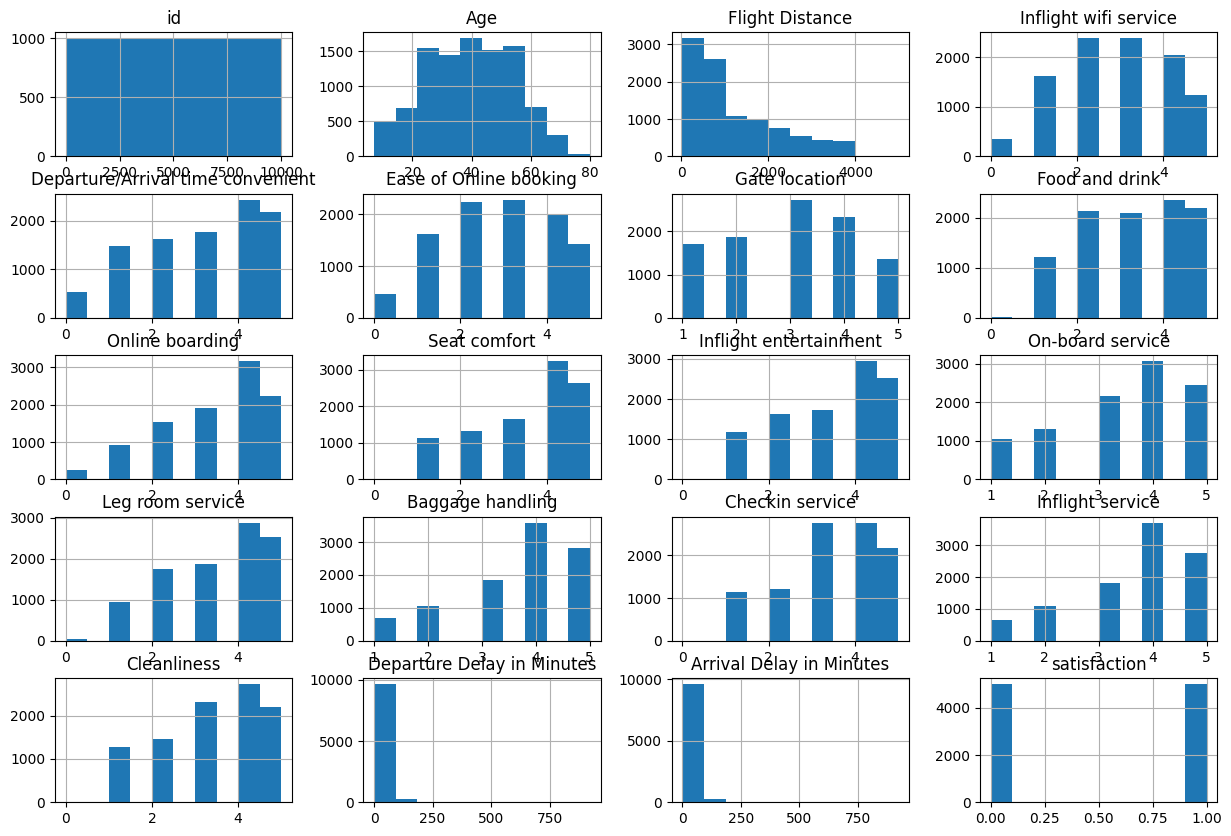

In [14]:
df_train.hist(figsize=(15,10))
plt.show()

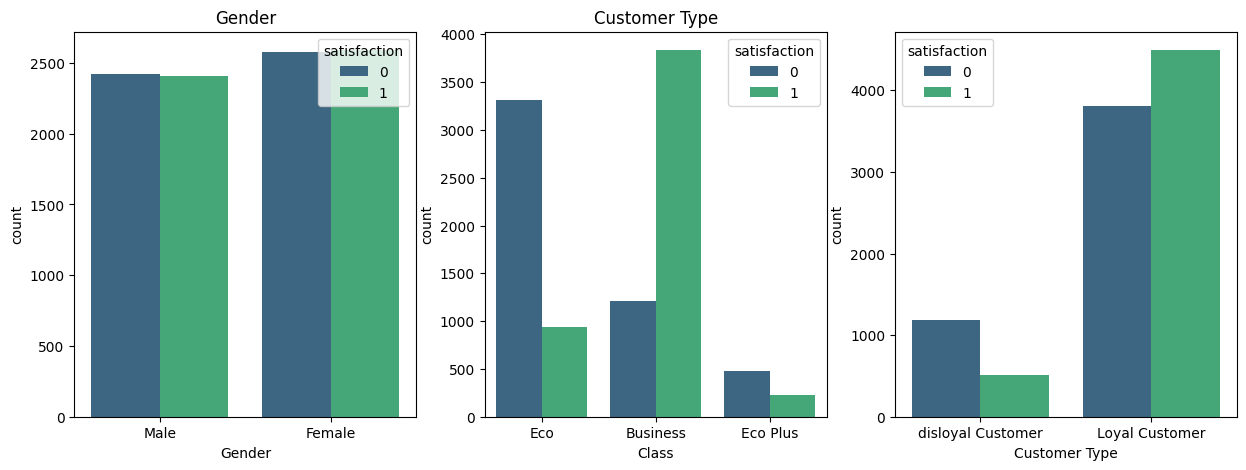

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=df_train, ax=axes[0])
axes[0].set_title("Gender")

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df_train, ax=axes[1])
axes[1].set_title("Class")

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=df_train, ax=axes[2])
axes[1].set_title("Customer Type")

plt.show()

In [18]:
df_train.isnull().sum().sum()

28

In [30]:
data = df_train.select_dtypes(exclude=['object'])
data.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,33,571,2,3,2,4,4,2,4,4,3,1,3,4,3,4,10,3.0,0
1,2,49,1431,4,1,4,4,3,5,4,5,5,5,5,3,5,3,0,0.0,1
2,3,43,867,1,4,4,4,4,4,3,1,1,1,1,1,1,2,0,18.0,0
3,4,27,1550,3,3,3,3,2,2,2,2,4,4,5,5,4,2,0,0.0,1
4,5,11,526,3,4,3,2,4,3,4,4,5,2,5,3,5,4,0,10.0,0


In [31]:
data.corrwith(data['satisfaction']).abs().sort_values(ascending=False)

,0
satisfaction,1.000000
Online boarding,0.504986
Inflight entertainment,0.400900
Seat comfort,0.342294
On-board service,0.326426
Leg room service,0.324368
Cleanliness,0.310338
Flight Distance,0.298703
Inflight wifi service,0.277395
Baggage handling,0.247965


In [29]:
object_columns = df_train.select_dtypes(include=['object']).columns
objects = df_train[object_columns]

In [27]:
objects

,Gender,Customer Type,Type of Travel,Class
0,Male,disloyal Customer,Business travel,Eco
1,Female,Loyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Eco
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Personal Travel,Eco
...,...,...,...,...
9995,Female,Loyal Customer,Personal Travel,Eco
9996,Female,Loyal Customer,Business travel,Eco Plus
9997,Male,Loyal Customer,Business travel,Business
9998,Female,Loyal Customer,Business travel,Business


In [34]:
df_train[df_train.isnull().any(axis=1)].shape[0]


28

In [41]:
label = LabelEncoder()
df_train['Gender'] = label.fit_transform(df_train['Gender'])
df_train['Customer Type'] = label.fit_transform(df_train['Customer Type'])
df_train['Type of Travel'] = label.fit_transform(df_train['Type of Travel'])
df_train['Class'] = label.fit_transform(df_train['Class'])


In [42]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class\t
0,1,1,1,33,0,1,571,2,3,2,...,3,1,3,4,3,4,10,3.0,0,1
1,2,0,0,49,0,0,1431,4,1,4,...,5,5,5,3,5,3,0,0.0,1,0
2,3,0,0,43,0,1,867,1,4,4,...,1,1,1,1,1,2,0,18.0,0,1
3,4,0,0,27,0,0,1550,3,3,3,...,4,4,5,5,4,2,0,0.0,1,0
4,5,1,0,11,1,1,526,3,4,3,...,5,2,5,3,5,4,0,10.0,0,1


In [44]:

df_test['Gender'] = label.fit_transform(df_test['Gender'])
df_test['Customer Type'] = label.fit_transform(df_test['Customer Type'])
df_test['Type of Travel'] = label.fit_transform(df_test['Type of Travel'])
df_test['Class'] = label.fit_transform(df_test['Class'])

In [49]:
X = df_train.drop('satisfaction', axis=1)
y = df_train['satisfaction']

In [50]:
y.head()

,satisfaction
0,0
1,1
2,0
3,1
4,0


In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model Accuracy: 0.95


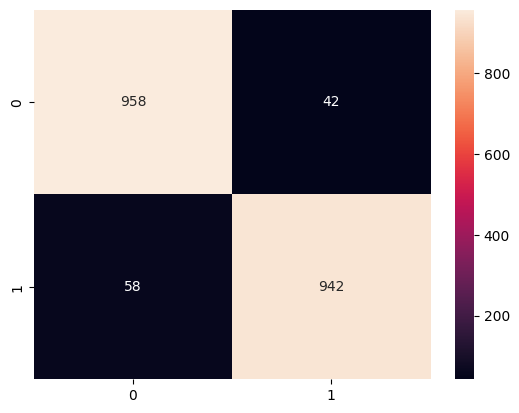

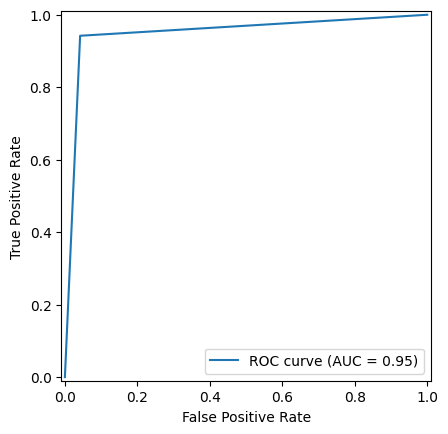

In [55]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model Accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve') # RocCurveDisplay is now defined
display.plot()
plt.show()